In [5]:
# Author: Roshan Ram
# AndrewID: rram

import yfinance as yfinance

import module_manager
module_manager.review()

import yfinance as yf # to pull stock data with yf.download(name, yyyy-mm-dd of opening, yyyy-mm-dd of opening)

import numpy as np # used for everything lol
import pandas as pd # data mainpulation
import matplotlib.pyplot as plt # graphing/plotting

%matplotlib inline 
#just to make stuff look nice

In [6]:
stock = None
while not isinstance(stock, str):
    stock = input("Enter your desired stock. Only alphanumeric characters please.")
openingInp = input("Enter your desired opening date. (yyyy-mm-dd)") #'2016-01-01'
closingInp = input("Enter your desired closing date. (yyyy-mm-dd)") # '2019-08-01'


data = yf.download(stock, openingInp, closingInp)

Enter your desired stock. Only alphanumeric characters please. AAPL
Enter your desired opening date. (yyyy-mm-dd) 2016-01-01
Enter your desired closing date. (yyyy-mm-dd) 2019-08-01


[*********************100%***********************]  1 of 1 completed


In [7]:
data.head() #let's see what the data looks like
# so we have the data, opening price, high val, low val, closing price, 
# adjusted close, and volume as parameters of our data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,98.446655,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,95.979675,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,94.101387,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,90.129868,81094400
2016-01-08,98.550003,99.110001,96.760002,96.959999,90.606438,70798000


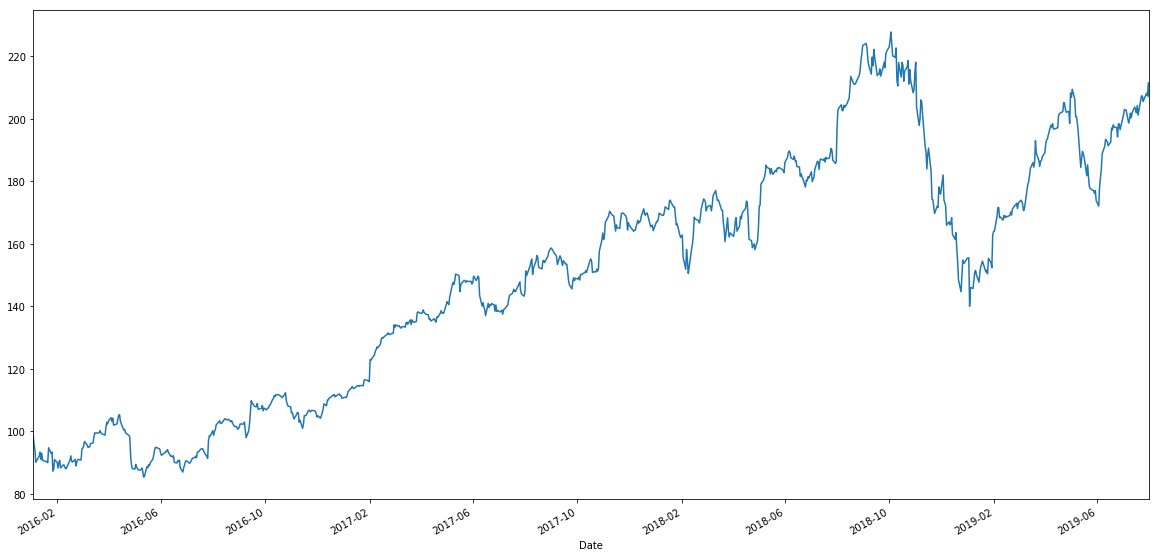

In [8]:
plt.rcParams["figure.figsize"] = (20,10)
data['Adj Close'].plot()
plt.show()


In [15]:
# commodity channel index (CCI) algorithm
# mathematical calculation: https://www.investopedia.com/terms/c/commoditychannelindex.asp
# CCI = (Typical price – MA of Typical price) / (0.015 * Standard deviation of Typical price)
def calcCCI(data, numDays):
    movingAverageSum = 0
    typicalPrice = (data['Low'] + data['High'] + data['Close'])/3
#     for row in range(len(data['Low'])-30):
#         for i in range(30):
#             movingAverageSum += 
    top = typicalPrice - pd.Series(typicalPrice).rolling(window=numDays).mean()
    bottom = pd.Series(0.015 * pd.Series(typicalPrice).rolling(window=numDays).std())
    cci = pd.Series(top/bottom, name = 'CCI')
    data = data.join(cci)
    return data

In [59]:
calcCCI(data, 30).head()

,Open,High,Low,Close,Adj Close,Volume,CCI
Date,,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,98.446655,67649400,NaN
2016-01-05,105.750000,105.849998,102.410004,102.709999,95.979675,55791000,NaN
2016-01-06,100.559998,102.370003,99.870003,100.699997,94.101387,68457400,NaN
2016-01-07,98.680000,100.129997,96.430000,96.449997,90.129868,81094400,NaN
2016-01-08,98.550003,99.110001,96.760002,96.959999,90.606438,70798000,NaN


In [11]:
def showCCI(data, numDays):
    cci = calcCCI(data, numDays)['CCI']
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(2, 1, 1)
    ax.set_xticklabels([])
    plt.plot(data['Close'],lw=1)
    plt.title('NSE Price Chart')
    plt.ylabel('Close Price')
    plt.grid(True)
    bx = fig.add_subplot(2, 1, 2)
    plt.plot(cci,'k',lw=0.75,linestyle='-',label='CCI')
    plt.legend(loc=2,prop={'size':9.5})
    plt.ylabel('CCI values')
    plt.grid(True)
    plt.setp(plt.gca().get_xticklabels(), rotation=30)
    plt.show()
    

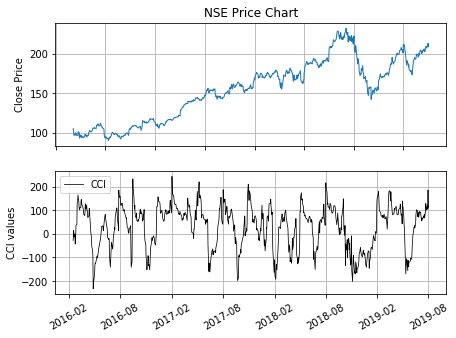

In [22]:
showCCI(data, 30)

In [30]:
def rollingAverage(data, numDays):
    total = [0]
    movingAverages = []
    for i, x in enumerate(data, 1):
        total.append(total[i-1] + x)
        if i >= numDays:
            currMovingAverage = (total[i] - total[i - numDays])/numDays
            movingAverages.append(currMovingAverage)
    
    return pd.Series(movingAverages)

In [26]:
#exponential calculation:
    # https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
def calcMA(data, numDays, calcType):
    '''
    calculates the moving average
    data: the data you want to use
    numDays: number of days to perform the average over
    calcType: the type of average to be done--
    '''
    if calcType == 'simple':
        simple = pd.Series(pd.Series(data['Close']).rolling(window=numDays).mean(), name='SMA')
#         pd.Series(typicalPrice).rolling(window=numDays).mean()
        data = data.join(simple)
        return data
    elif calcType == 'exponential':
#         exp = pd.Series(pd.ewma(data['Close'], span = numDays, min_periods = numDays))
        exp = data.ewm(span = numDays, min_periods = numDays, adjust=False).mean() # todo this doesn't work, just rewrite real way
        
        data = data.join(exp)
        return data
    


In [20]:
# def stochasticK(close, low, high, n):  
#     STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
#     return STOK

# def stochasticD(close, low, high, n):
#     STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
#     STOD = pd.rolling_mean(STOK, 3)
#     return STOD
   
# df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
# df['High'] = get_high('FB', '1/1/2016', '12/31/2016')
# df['Low'] = get_low('FB', '1/1/2016', '12/31/2016')
# df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
# df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)
# df.tail()

In [21]:
# ease of movement: 
def EVM(data, numDays): 
 distMoved = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
 boxRatio = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
 evm = distMoved/boxRatio
 evmMA = pd.Series(rollingMean(evm, numDays), name = 'EVM') 
 data = data.join(evmMA) 
 return data 

In [32]:
def calcRSI(data, )
    higher       = []
    lower        = []
    past14Days   = [6971.73, 6937.08, 8218.05, 9251.27, 8870.82, 9114.72, 10226.86, 10107.26, 11233.95, 11767.74, 11459.71, 11104.2, 11175.87, 11429.02]

    x = 0
    for i in past14Days:
        if len(past14Days)-1 >= x+1:

            if past14Days[x+1] > past14Days[x]:
                high = past14Days[x+1] - past14Days[x]
                higher.append(high)

            elif past14Days[x+1] < past14Days[x]:
                low = past14Days[x] - past14Days[x+1]
                lower.append(low)
        x+=1

    upwordAvg   = sum(higher) / len(higher) 
    downwordAvg = sum(lower) / len(lower)
    print(upwordAvg)
    print(downwordAvg)
    RS          = upwordAvg / downwordAvg
    RSI         = 100 - (100/(1+RS))

    print(RSI)

SyntaxError: invalid syntax (<ipython-input-32-26cd07f2bcfc>, line 1)

In [38]:
# average directional movement (adm): https://www.tradingtechnologies.com/xtrader-help/x-study/technical-indicator-definitions/average-directional-movement-adx/

def advi(df, n, n_ADX):
    pass

In [44]:
def stochasticK(df):
    """Calculate stochastic oscillator %K for given data.
    input: pandas DataFrame
    output: pandas DataFrame
    """
    stochK = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='stochastic %K')
    df = df.join(stochK)
    return df

In [58]:
def stochasticD(df, numDays):
    """Calculate stochastic oscillator %D for given data.
    input: pandas DataFrame
    output: pandas DataFrame
    """
    stochK = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='stochastic %K')
    stochD = pd.Series(stochK.ewm(span=numDays, min_periods=numDays).mean(), name=f'stochastic %D, {str(numDays)} days') # todo: rewrite ewm manually
    df = df.join(stochD)
    return df

In [57]:
stochasticK(data).head()

,Open,High,Low,Close,Adj Close,Volume,stochastic %K
Date,,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,98.446655,67649400,0.994064
2016-01-05,105.750000,105.849998,102.410004,102.709999,95.979675,55791000,0.087208
2016-01-06,100.559998,102.370003,99.870003,100.699997,94.101387,68457400,0.331998
2016-01-07,98.680000,100.129997,96.430000,96.449997,90.129868,81094400,0.005405
2016-01-08,98.550003,99.110001,96.760002,96.959999,90.606438,70798000,0.085105


In [56]:
stochasticD(data, 20).head()

,Open,High,Low,Close,Adj Close,Volume,"stochastic %D, 20 days"
Date,,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,98.446655,67649400,NaN
2016-01-05,105.750000,105.849998,102.410004,102.709999,95.979675,55791000,NaN
2016-01-06,100.559998,102.370003,99.870003,100.699997,94.101387,68457400,NaN
2016-01-07,98.680000,100.129997,96.430000,96.449997,90.129868,81094400,NaN
2016-01-08,98.550003,99.110001,96.760002,96.959999,90.606438,70798000,NaN


In [60]:
# rate of change (roc): https://www.investopedia.com/terms/p/pricerateofchange.asp
def roc(data, n):
    '''
    "a momentum-based technical indicator that measures the 
    percentage change in price between the current price and 
    the price a certain number of periods ago. The ROC indicator
    is plotted against zero, with the indicator moving upwards into 
    positive territory if price changes are to the upside, and moving 
    into negative territory if price changes are to the downside."
    '''
    roc = 100 * ((close - close.shift(n)) / close.shift(n))
    if fillna:
        roc = roc.replace([np.inf, -np.inf], np.nan).fillna(0)
    return pd.Series(roc, name='ROC')

In [67]:
# bollinger bands (bb): https://traderhq.com/ultimate-guide-to-bollinger-bands/
def calcbolBands(data):
    # Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
    data['MA'] = data['Adj Close'].rolling(window=20).mean()
    data['STD'] = data['Adj Close'].rolling(window=20).std()
    data['UpperBand'] = data['MA'] + (data['STD'] * 2)
    data['LowerBand'] = data['MA'] - (data['STD'] * 2)

    # Simple 30 Day Bollinger Band for Facebook (2016-2017)
#     stock[pd.DataFrame('Adj Close', '30 Day MA', 'Upper Band', 'Lower Band')].plot(figsize=(12,6))
    stock[pd.DataFrame('Adj Close', '30 Day MA', 'Upper Band', 'Lower Band')].plot(figsize=(12,6))
    plt.title('30 Day Bollinger Band for Facebook')
    plt.ylabel('Price (USD)')
    plt.show();

In [68]:
calcbolBands(data)

TypeError: data type 'Lower Band' not understood